# chap 4. matplotlib 으로 그래프 그리기

## 1. 선그래프

In [1]:
import pandas as pd
import matplotlib.pyplot as plt   # 그래프 모듈

In [ ]:
df = pd.read_exc

In [ ]:
df = pd.read_excel('./dataset/시도별 전출입 인구수.xlsx', header=0)
df.head()

In [17]:
# Nan 을 이전 값으로 대체 : df.fillna(method='ffill')
df = df.fillna(method = 'ffill')
df.head()

# 전출지가 '서울특별시' 에서 다른 도시로 이전한 인구수의 분포를 분석하고자 함
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')
# mask[10: 40]
# df_seoul = df[ (df['전출지별'] == '서울특별시') & (df['전입지별'] !='서울특별시')]
df_seoul = df[mask]  # mask의 값이 True인 행만 추출
df_seoul

# 전출지별의 값은 모두 '서울특별시' 이므로 컬럼 삭제
df_seoul = df_seoul.drop('전출지별', axis=1)
df_seoul

# 전입지별 컬럼명을 '전입지'로 변경
df_seoul.rename({'전입지별' : '전입지'}, axis=1, inplace=True)
df_seoul

# '전입지' 컬럼을 인덱스로 설정
df_seoul.set_index('전입지', inplace=True)

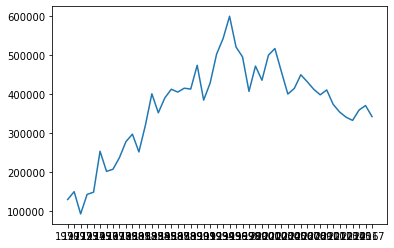

In [22]:
# df_seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', :]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)

# plt.plot(sr_one.index, sr_one.values)

In [50]:
# matplotlib 한글 폰트 문제 해결
from matplotlib import rc

rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

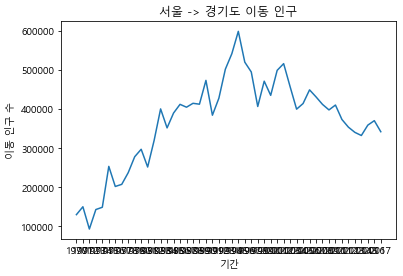

In [29]:
# df_seoul 에서 전입지가 '경기도'인 자료만 추출
sr_one = df_seoul.loc['경기도', :]
sr_one

# 기본 선 그래프로 그리기
plt.plot(sr_one)

# plt.plot(sr_one.index, sr_one.values)
# 그래프에 제목 추가, 축 이름 추가
# 서울 -> 경기도 이동 인구
# x축 이름 -> '기간', y축 이름 -> '이동 인구 수'
plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
           
plt.show()

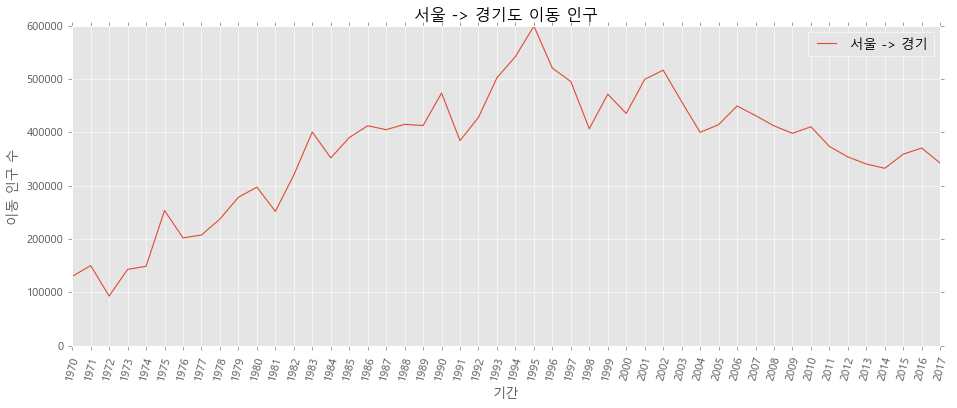

In [51]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정

# x축 눈금 라벨 회전 : plt.xticks(rotation = 'vertical')
# plt.xticks(rotation='vertical')
plt.xticks(rotation=75)  #  rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one)

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

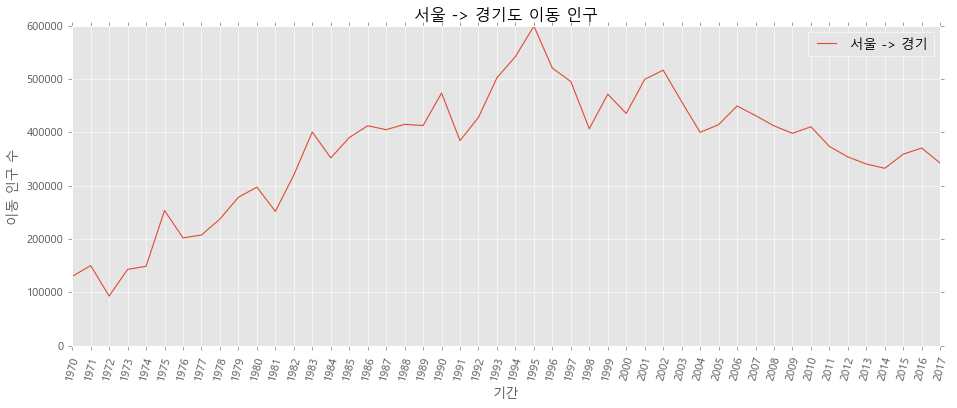

In [52]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
plt.style.use('ggplot')
# x축 눈금 라벨 회전 : plt.xticks(rotation = 'vertical')
# plt.xticks(rotation='vertical')
plt.xticks(rotation=75)  #  rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one)

plt.title('서울 -> 경기도 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구 수')
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

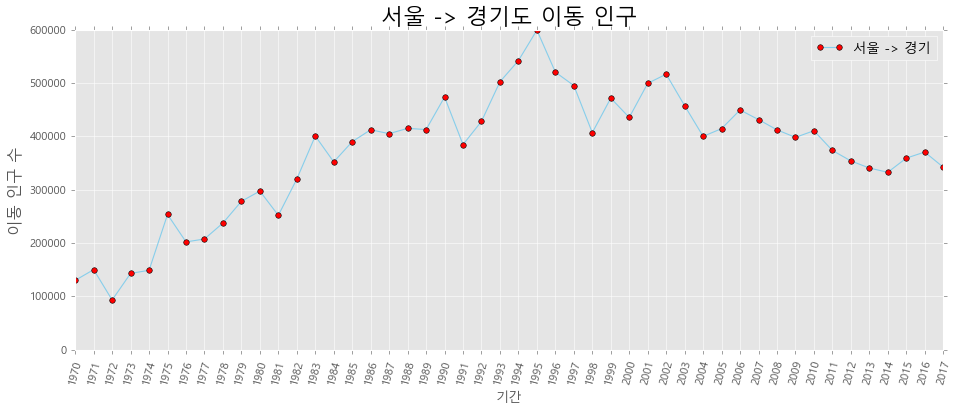

In [64]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정
plt.xticks(size=10, rotation=75)  #  rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one, marker='o', markersize=5, color='skyblue',
         mfc='red')

plt.title('서울 -> 경기도 이동 인구', size=20)
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size=14)
plt.legend(labels=['서울 -> 경기'], loc='best')

plt.show()

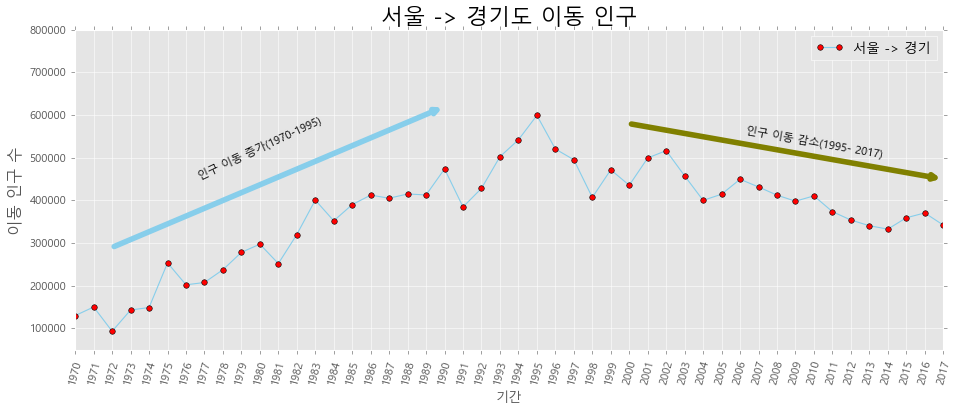

In [79]:
plt.figure(figsize=(14,5))   # 그래프 사이즈 지정

plt.xticks(size=10, rotation=75)  #  rotation = 숫자는 회전 각도를 의미
plt.plot(sr_one, marker='o', markersize=5, color='skyblue',
         mfc='red')

plt.title('서울 -> 경기도 이동 인구', size=20)
plt.xlabel('기간')
plt.ylabel('이동 인구 수', size=14)
plt.legend(labels=['서울 -> 경기'], loc='best')

# 설명 추가 
# y축 범위 지정 (최소값, 최대값)
plt.ylim(50000, 800000)

# 주석 표시 : 화살표 정의
plt.annotate('',
             xy = (20, 620000),   # 화살표의 머리 부분(끝점)
             xytext = (2,290000), # 화살표의 꼬리 부분 (시작점)
             arrowprops = dict(arrowstyle='->', color='skyblue', lw=5) # 화살표
            )
plt.annotate('',
             xy = (47, 450000),   # 화살표의 머리 부분(끝점)
             xytext = (30,580000), # 화살표의 꼬리 부분 (시작점)
             arrowprops = dict(arrowstyle='->', color='olive', lw=5) # 화살표
            )

# 주석 표시 : 문장
plt.annotate("인구 이동 증가(1970-1995)",
             xy = (10,450000),
             rotation=25,
             va='baseline' ,
             ha='center',
             fontsize=10
            )
plt.annotate("인구 이동 감소(1995- 2017)",
             xy = (40,500000),
             rotation=-10,
             va='baseline' ,
             ha='center',
             fontsize=10
            )            


plt.show()

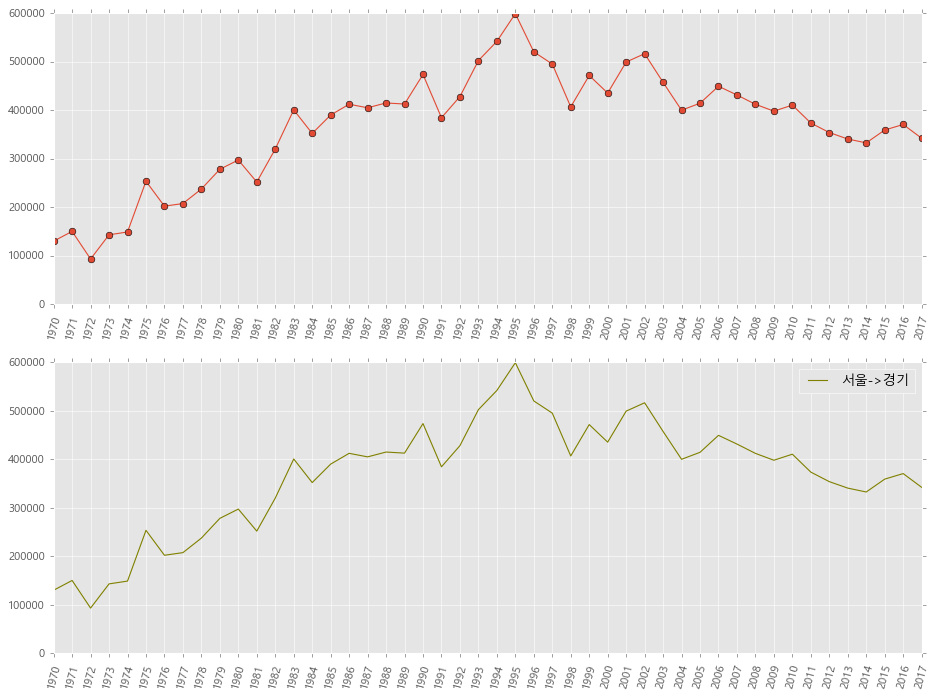

In [119]:
# 한 화면에 두개의 그래프 그리기 : add_subplot()

fig = plt.figure(figsize = (14,10))

ax1 = fig.add_subplot(2, 1, 1)  # 한 행에 2개, 1열에 1개, 위치
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 그리기
ax1.plot(sr_one, marker='o')
ax2.plot(sr_one, color='olive', label='서울->경기')
ax2.legend(loc='best')

ax1.set_xticks(ticks=sr_one.index, labels= sr_one.index, rotation=75)
ax2.set_xticks(ticks=sr_one.index, labels= sr_one.index, rotation=75)

plt.show()

In [97]:
col_years = list( map( str, range(1970, 2018)))   # 년도를  1970 ~ 2017 
# col_years

df_1 = df_seoul.loc[['충청남도', '경상북도', '강원도'], col_years]
df_1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016


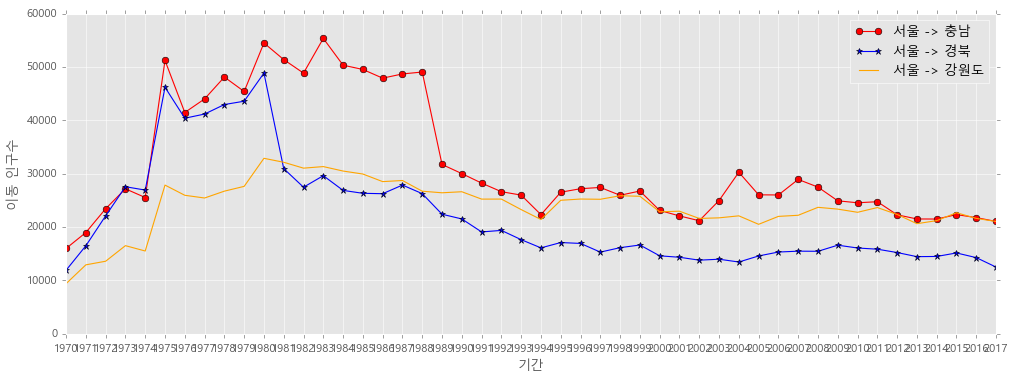

In [101]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(1, 1, 1)

# axe 에 그래프 추가
ax.plot(col_years, df_1.loc['충청남도', :], color='red', 
        marker='o',label ='서울 -> 충남')
ax.plot(col_years, df_1.loc['경상북도', :], color='blue',
        marker='*',label ='서울 -> 경북')
ax.plot(col_years, df_1.loc['강원도', :], color='orange', label ='서울 -> 강원도')

ax.legend(loc='best')

# x label 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

plt.show()

In [130]:
# df_2 -> 서울에서 충청남도, 경상북도, 강원도, 전라남도로 이동한 자료를 가져옴
#   1980년도에서 2016년도 까지의 자료만 
col_years = list(map(str, range(1980,2017)))  # 저장된 자료가 str , int -> str

df_2 = df_seoul.loc[ ['충청남도','경상북도','강원도','전라남도'], col_years]
df_2

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,54480,51369,48834,55344,50318,49520,47888,48678,49038,31707,...,28898,27458,24889,24522,24723,22269,21486,21473,22299,21741
경상북도,48839,30928,27440,29601,26842,26297,26221,27844,26235,22374,...,15448,15425,16569,16042,15818,15191,14420,14456,15113,14236
강원도,32858,32116,31013,31308,30470,29911,28489,28699,26691,26394,...,22177,23668,23331,22736,23624,22332,20601,21173,22659,21590
전라남도,56251,57645,55408,57737,52779,52629,41082,42667,40695,36188,...,17717,16601,17468,16429,15974,14765,14187,14591,14598,13065


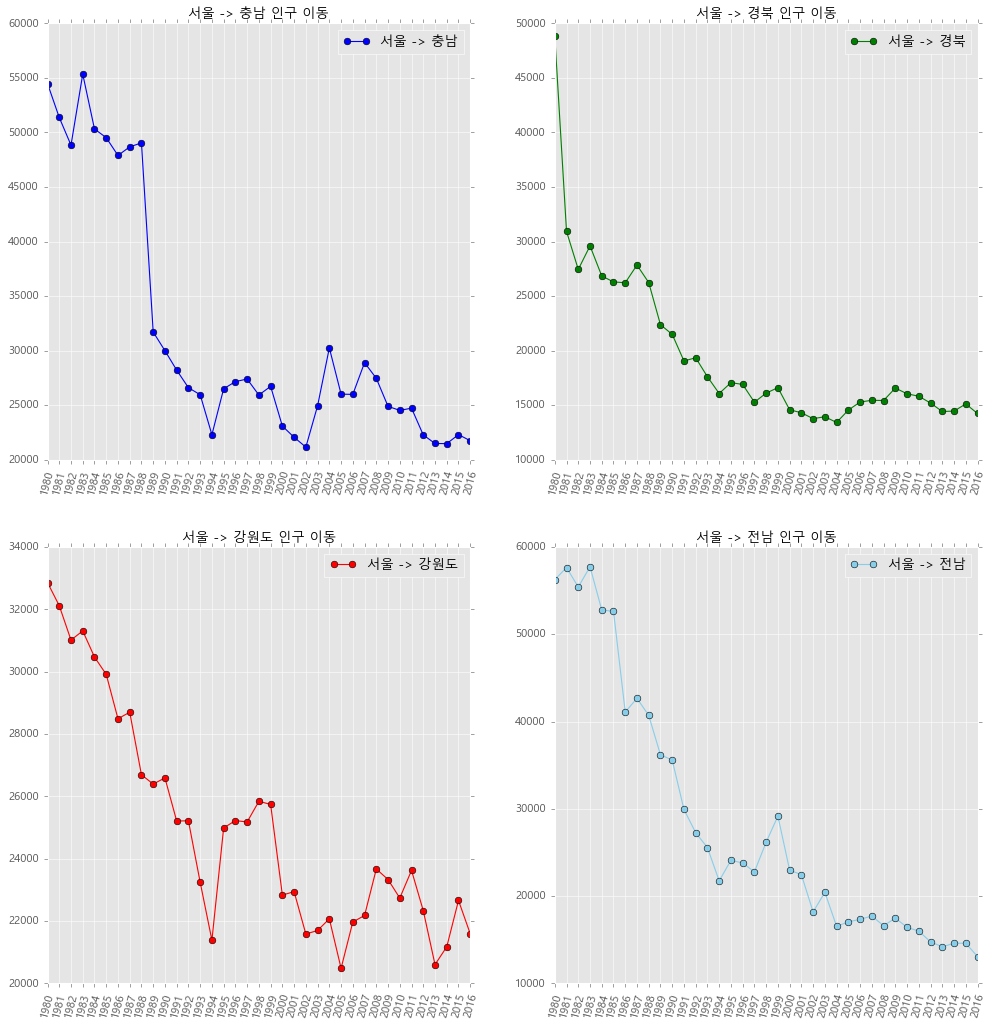

In [136]:
#  그래프 : 각 도시를 하나의 그래프에, 한 페이지 4개의 그래프로
fig = plt.figure(figsize=(15,15))

# 충청남도 그래프 지정
ax1 = fig.add_subplot(2, 2, 1)   # 충남
ax2 = fig.add_subplot(2, 2, 2)   # 경북
ax3 = fig.add_subplot(2, 2, 3)   # 강원도
ax4 = fig.add_subplot(2, 2, 4)   # 전남

# 각 그래프 객체에 그래프 출력
ax1.plot(col_years, df_2.loc['충청남도', :], marker='o', color='blue',
         label = '서울 -> 충남')
ax2.plot(col_years, df_2.loc['경상북도', :], marker='o', color='green',
         label = '서울 -> 경북')
ax3.plot(col_years, df_2.loc['강원도', :], marker='o', color='red',
         label = '서울 -> 강원도')
ax4.plot(col_years, df_2.loc['전라남도', :], marker='o', color='skyblue',
         label = '서울 -> 전남')
    
# 범례 표시
ax1.legend(); ax2.legend(); ax3.legend(); ax4.legend()

# 각 그래프의 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=12)
ax2.set_title('서울 -> 경북 인구 이동', size=12)
ax3.set_title('서울 -> 강원도 인구 이동', size=12)
ax4.set_title('서울 -> 전남 인구 이동', size=12)

# 각 그래프의 xticks 지정
ax1.set_xticks(ticks=col_years, labels=col_years, rotation=75)
ax2.set_xticks(ticks=col_years,labels=col_years, rotation=75)
ax3.set_xticks(ticks=col_years,labels=col_years, rotation=75)
ax4.set_xticks(ticks=col_years,labels=col_years, rotation=75)

plt.show()

In [ ]:
df_2 = df_seoul.loc[ [], []   ]

In [120]:
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [144]:
# twin 그래프 : x축은 동일 y축의 범위가 서로 다른 그래프 그리기
df = pd.read_excel('./dataset/남북한발전전력량.xlsx')
df

# 북한의 수력, 화력 발전량의 추이를 분석
df = df.loc[5:]
df  # 전력량 (억㎾h) 컬럼 제거
df = df.drop('전력량 (억㎾h)', axis=1)
df  
# 발전 전력별 컬럼을 인덱스로 
df.set_index('발전 전력별', inplace=True)
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df_t = df.T
df_t

In [ ]:
# 합계 -> 총발전량
df_t = df_t.rename(columns={'합계':'총발전량'})
df_t

In [ ]:
print(df_t['총발전량'])
print()
print(df_t['총발전량'].shift(1))   # 전년도 발전량

In [ ]:
df_t['전년도발전량'] = df_t['총발전량'].shift(1)
df_t

In [ ]:
# 증감율 : (총발전량/전년도발전량 - 1 ) * 100
df_t['증감율'] = (df_t['총발전량']/df_t['전년도발전량'] -1 ) * 100
df_t

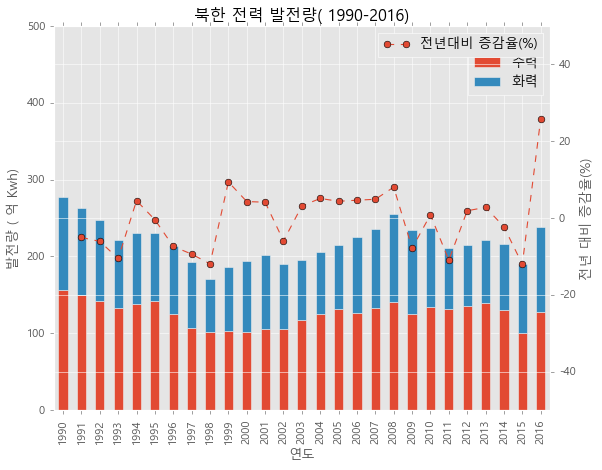

In [157]:
# 2개축 그래프 그리기 : 수력 화력 -> 막대 그래프, 증감율 -> 선 그래프

ax1 = df_t[['수력','화력']].plot(kind='bar', stacked=True)
ax2 = ax1.twinx()   # y 축의 값의 범위가 다른 경우
ax2.plot(df_t.index, df_t.증감율, ls='--', 
         marker='o', label='전년대비 증감율(%)')

ax1.set_ylim(0, 500)
ax2.set_ylim(-50, 50)

ax1.set_xlabel("연도")
ax1.set_ylabel('발전량 ( 억 Kwh)')
ax2.set_ylabel("전년 대비 증감율(%)")

plt.title("북한 전력 발전량( 1990-2016)")
plt.legend(loc='best')
plt.show()

In [154]:
df_t

발전 전력별,총발전량,수력,화력,원자력,전년도발전량
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [147]:
# 증감율 : ((총발전량 / (총발전량 - 전년도 총 발전량) -1 ) * 100
# ['총발전량 - 1년']

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-
